# Análise de Dados – Estatísticas do Trabalho

## 1 Projeto

Seja bem-vindo (a)!

Esse notebook está sendo desenvolvido para a disciplina de "Estrutura de dados", ministrada pelo professor Fernando Masanori, do curso de Análise e Desenvolvimento de Sistemas, no ano de 2021, na FATEC de São José dos Campos - SP.

Nosso objetivo é proporcionar um ambiente de análise de dados do trabalho no período da pandemia.

Para entender como foram levantados os requisitos e obter mais informações de como o projeto foi desenvolvido, acesse o [Github](https://github.com/BettoFranca/Analise_dados_publicos_Estatisticas_do_Trabalho_na_Pandemia) da nossa equipe de trabalho.



### Importando as bibliotecas:

In [1]:
import numpy as np
import pandas as pd
import csv
low_memory=False
%matplotlib inline

## 2 Inputs

### Importando os dados
Importamos os dados do [PNAD](https://github.com/BettoFranca/Analise_dados_publicos_Estatisticas_do_Trabalho_na_Pandemia/blob/main/Documentos/bases_de_dados/pnad_covid19_202011_trabalho_BR_GR_UF.xlsx), qué uma pesquisa feita pelo IBGE que tem por objetivo estimar o número de pessoas com sintomas referidos associados à síndrome gripal e monitorar os impactos da pandemia da COVID-19 no mercado de trabalho brasileiro.

A coleta da Pesquisa Nacional por Amostra de Domicílios - PNAD COVID19 teve início em 4 de maio de 2020, com entrevistas realizadas por telefone em, aproximadamente, 48 mil domicílios por semana, totalizando cerca de 193 mil domicílios por mês, em todo o Território Nacional. A amostra é fixa, ou seja, os domicílios entrevistados no primeiro mês de coleta de dados permanecerão na amostra nos meses subsequentes, até o fim da pesquisa.

In [2]:
#Importa dados do PNAD
colunas = [0, 1, 3, 4, 7, 8, 10, 12, 14, 16, 18]
filename = r'C:/Users/User/Desktop/bases_de_dados/pnad_covid19_202011_trabalho_BR_GR_UF.xlsx'
df = pd.read_excel(filename, usecols=colunas)

In [3]:
df.sample(5)

,Indicador,Nível Territorial,Variável de abertura 1,Categoria de abertura 1,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro
3932,Massa de rendimento médio real efetivamente re...,Grande Região,Posição na ocupação e categoria do emprego,Conta-própria,1910.689576,1997.963885,2290.843974,2473.544588,2565.461468,2685.750073,2667.000351
4092,Pessoas ocupadas e afastadas do trabalho que t...,Grande Região,Grupamentos ocupacionais,Profissionais das ciências e intelectuais,219.705960,185.174747,148.969300,106.903038,86.775503,67.624192,57.015228
395,Taxa de participação na força de trabalho (%),País,Grupos de idade,14 a 29 anos,49.763814,50.657003,50.168384,51.497321,52.519001,53.525392,53.969464
9868,CV - Distribuição das pessoas de 14 anos ou ma...,Grande Região,Cor ou raça,Branca,0.542803,0.515628,0.512112,0.514859,0.511667,0.508095,0.514552
10915,"Pessoas ocupadas e não afastadas do trabalho, ...",Grande Região,Posição na ocupação e categoria do emprego,Empregado do setor público com carteira assinada,81.097832,75.310907,78.443471,78.188152,78.739138,74.985683,75.151327


In [4]:
#Troca o nome das colunas
df.rename(columns={'Variável de abertura 1': 'Variavel',
                   'Categoria de abertura 1': 'Categoria',
                   'Nível Territorial': 'Territorio',
                   'Maio': '05/2020', 'Junho': '06/2020', 'Julho': '07/2020',
                   'Agosto': '08/2020', 'Setembro': '09/2020', 'Outubro': '10/2020', 'Novembro': '11/2020'
                  }, inplace=True)

In [5]:
df.query('Indicador == "Pessoas ocupadas (mil pessoas)" and Territorio == "País" and Categoria != "Total1"')[['Categoria',
            '05/2020', '06/2020', '07/2020','08/2020','09/2020','10/2020','11/2020']].head(10)
#A tabela abaixo apresenta o total de pessoas empregadas de Maio/20 a Novembro/20 de acordo com o PNAD (mil pessoas)

,Categoria,05/2020,06/2020,07/2020,08/2020,09/2020,10/2020,11/2020
132,Total,84404.201116,83449.134741,81483.617297,82141.164969,82934.240754,84134.092209,84660.818224
133,Homem,48283.892895,47914.336430,47468.935840,48013.788774,48557.512881,49192.315591,49446.471600
134,Mulher,36120.308220,35534.798311,34014.681457,34127.376195,34376.727874,34941.776618,35214.346624
136,Branca,39243.102086,38669.975101,37942.602629,38255.428992,38647.634682,39127.887077,39343.041065
137,Preta ou parda,44114.750386,43831.799407,42624.287230,42956.595585,43361.108760,44093.849010,44385.766201
138,Total,84404.201116,83449.134741,81483.617297,82141.164969,82934.240754,84134.092209,84660.818224
139,14 a 29 anos,21503.088827,21228.223874,20667.262080,20863.142606,21215.998401,21542.305393,21581.528909
140,30 a 49 anos,43745.857227,43234.671172,42492.233925,42792.796256,43144.487392,43745.812610,44056.461404
141,50 a 59 anos,13574.290349,13484.952077,13131.246791,13205.824160,13277.136078,13427.672524,13550.081350
142,60 anos ou mais,5580.964713,5501.287618,5192.874501,5279.401947,5296.618883,5418.301682,5472.746561


In [6]:
df.query('Indicador == "Pessoas ocupadas (mil pessoas)" and Territorio == "País" and Categoria == "Homem"')[['Categoria',
        '05/2020', '06/2020', '07/2020','08/2020','09/2020','10/2020','11/2020']].melt(id_vars=["Categoria"], 
        var_name="Mes", value_name="Empregados")
#A tabela apresenta a quantidade de homens empregados de 05/2020 a 11/2020 (mil pessoas)

,Categoria,Mes,Empregados
0,Homem,05/2020,48283.892895
1,Homem,06/2020,47914.336430
2,Homem,07/2020,47468.935840
3,Homem,08/2020,48013.788774
4,Homem,09/2020,48557.512881
5,Homem,10/2020,49192.315591
6,Homem,11/2020,49446.471600


In [7]:
Ocupados = df.query('Indicador == "Pessoas ocupadas (mil pessoas)" and Territorio == "País" ')[['Categoria', 'Variavel',
    '05/2020', '06/2020', '07/2020','08/2020','09/2020','10/2020','11/2020']].melt(id_vars=["Categoria","Variavel"], 
        var_name="Mes", value_name="Empregados")
#Esse código cria a variável Ocupados, que traz a quantidade de pessoas empregadas no Brasil no periodo de 05/2020 a 11/2020

## 3 Analisando os dados
### 3.1 Indice de pessoas empregadas e desempregadas
O PNAD foi realizado de Maio de 2020 a Novembro de 2020.
O gráfico abaixo compara a quantidade de homens empregados com mulheres empregadas no período:

Text(0, 0.5, 'Qtd (x mil)')

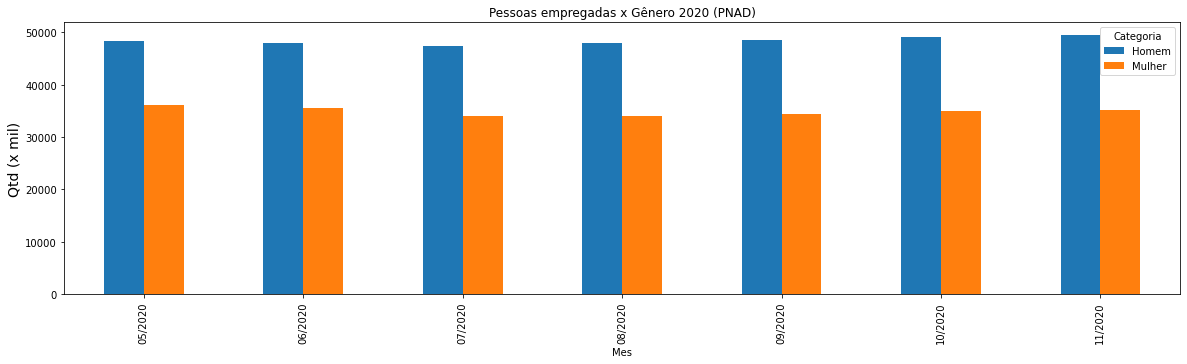

In [8]:
Ocupados.query('Categoria != "Total1" and Variavel == "Sexo" and Categoria != "Total"').groupby(['Mes',
                    'Categoria']).Empregados.sum().unstack().sort_values(by = 'Mes', ascending=True).plot(kind='bar', figsize = (20,5),
                        title = 'Pessoas empregadas x Gênero 2020 (PNAD)').set_ylabel('Qtd (x mil)',fontsize=14)
#Gera o gráfico abaixo a partir da variável Ocupados.
#O gráfico compara a quantidade de pessoas empregadas por gênero

In [9]:
Ocupados.query('Categoria != "Total1" and Variavel == "Sexo" and Categoria != "Total"').groupby(['Mes',
                    'Categoria']).Empregados.sum().sort_values()


Mes      Categoria
07/2020  Mulher       34014.681457
08/2020  Mulher       34127.376195
09/2020  Mulher       34376.727874
10/2020  Mulher       34941.776618
11/2020  Mulher       35214.346624
06/2020  Mulher       35534.798311
05/2020  Mulher       36120.308220
07/2020  Homem        47468.935840
06/2020  Homem        47914.336430
08/2020  Homem        48013.788774
05/2020  Homem        48283.892895
09/2020  Homem        48557.512881
10/2020  Homem        49192.315591
11/2020  Homem        49446.471600
Name: Empregados, dtype: float64

In [10]:
Desocupados = df.query('Indicador == "Pessoas desocupadas (mil pessoas)" and Territorio == "País" ')[['Categoria', 'Variavel',
    '05/2020', '06/2020', '07/2020','08/2020','09/2020','10/2020','11/2020']].melt(id_vars=["Categoria","Variavel"], 
        var_name="Mes", value_name="Empregados")
#Cria a variavel Desocupados 

O gráfico abaixo compara a quantidade de homens desempregados com mulheres desempregadas no período:

Text(0, 0.5, 'Qtd (x mil)')

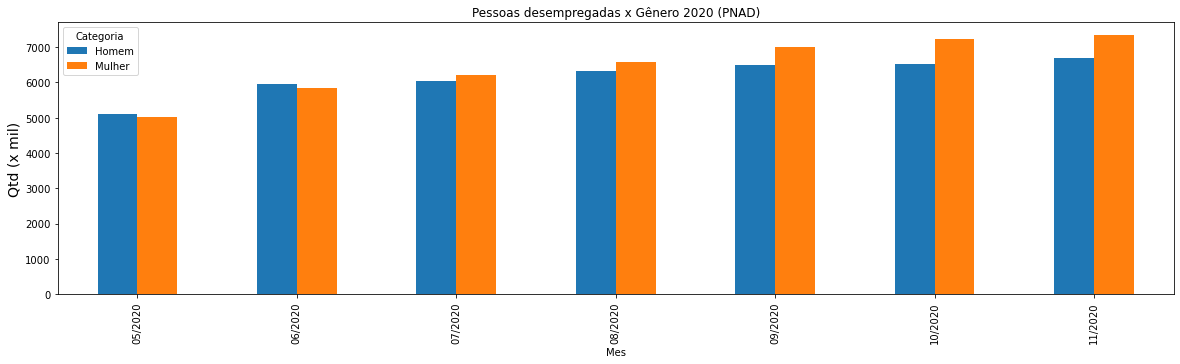

In [11]:
Desocupados.query('Categoria != "Total1" and Variavel == "Sexo" and Categoria != "Total"').groupby(['Mes',
                    'Categoria']).Empregados.sum().unstack().sort_values(by = 'Mes', ascending=True).plot(kind='bar', figsize = (20,5),
                        title = 'Pessoas desempregadas x Gênero 2020 (PNAD)').set_ylabel('Qtd (x mil)',fontsize=14)
#O grafico compara a quantidade de pessoas desempregadas por gênero

Comparamos a quantidade de pessoas empregadas de acordo com sua faixa etária:

Text(0, 0.5, 'Qtd (x mil)')

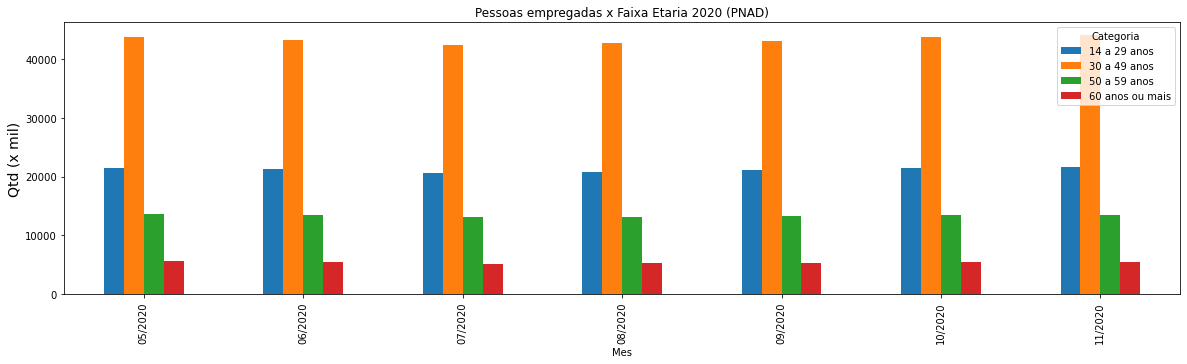

In [12]:
Ocupados.query('Variavel == "Grupos de idade" and Categoria != "Total"').groupby(['Mes',
                    'Categoria']).Empregados.sum().unstack().sort_values(by = 'Mes', ascending=True).plot(kind='bar', figsize = (20,5),
                        title = 'Pessoas empregadas x Faixa Etaria 2020 (PNAD)').set_ylabel('Qtd (x mil)',fontsize=14)
#O gráfico compara a quantidade de pessoas empregadas pela faixa etária

Comparamos a quantidade de pessoas desempregadas de acordo com sua faixa etária:

Text(0, 0.5, 'Qtd (x mil)')

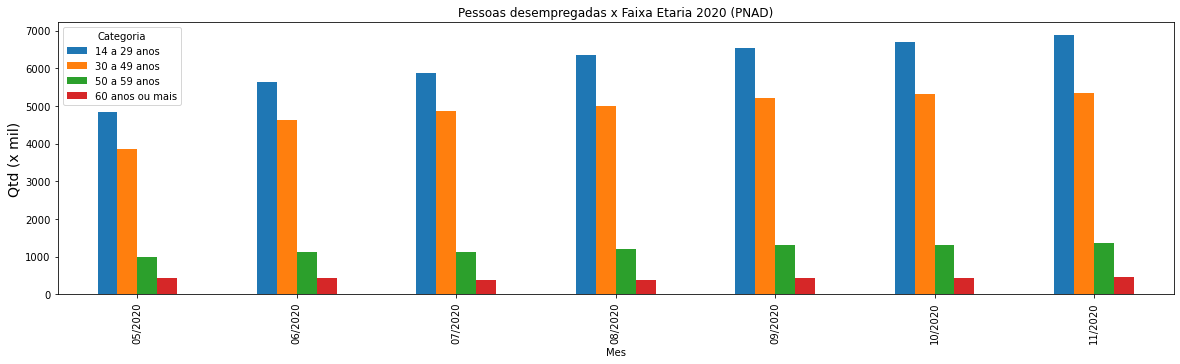

In [13]:
Desocupados.query('Variavel == "Grupos de idade" and Categoria != "Total"').groupby(['Mes',
                    'Categoria']).Empregados.sum().unstack().sort_values(by = 'Mes', ascending=True).plot(kind='bar', figsize = (20,5),
                        title = 'Pessoas desempregadas x Faixa Etaria 2020 (PNAD)').set_ylabel('Qtd (x mil)',fontsize=14)
#O gráfico compara a quantidade de pessoas desempregadas pela faixa etária

Comparamos a quantidade de pessoas empregadas de acordo com seu nível de instrução:

Text(0, 0.5, 'Qtd (x mil)')

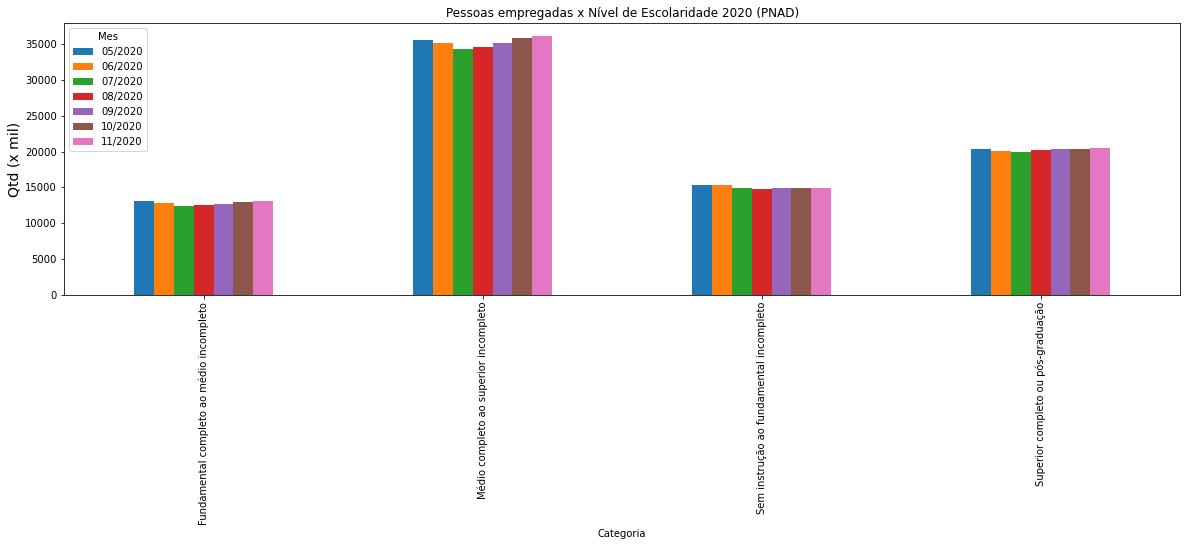

In [14]:
Ocupados.query('Variavel == "Nível de instrução" and Categoria != "Total"').groupby(['Categoria',
                    'Mes']).Empregados.sum().unstack().plot(kind='bar', figsize = (20,5),
                        title = 'Pessoas empregadas x Nível de Escolaridade 2020 (PNAD)').set_ylabel('Qtd (x mil)',fontsize=14)
#Por escolaridade

Comparamos a quantidade de pessoas desempregadas de acordo com seu nível de instrução:

Text(0, 0.5, 'Qtd (x mil)')

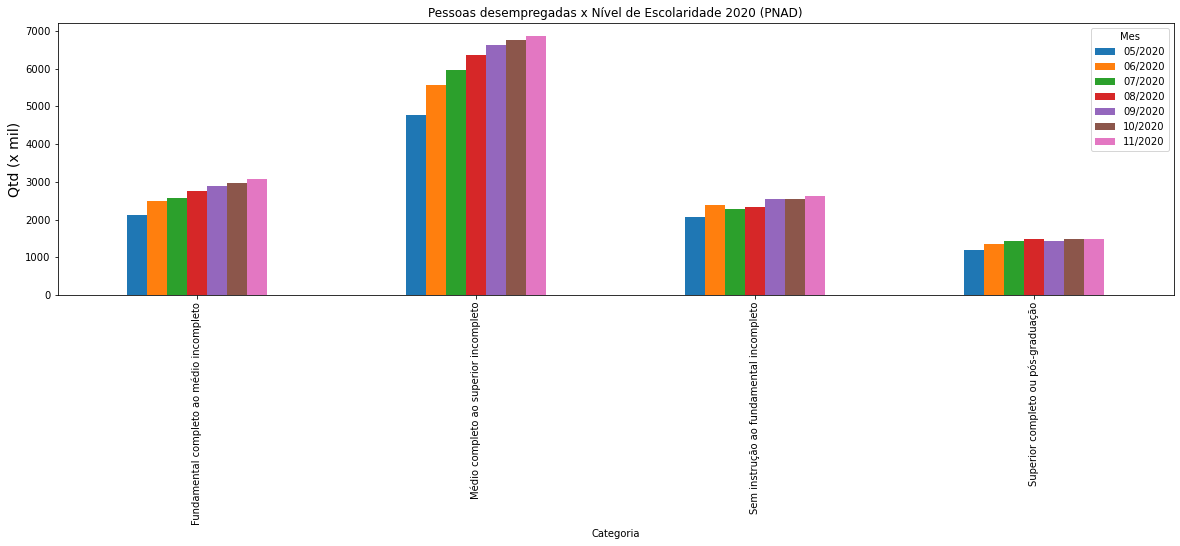

In [15]:
Desocupados.query('Variavel == "Nível de instrução" and Categoria != "Total"').groupby(['Categoria',
                    'Mes']).Empregados.sum().sort_values().unstack().plot(kind='bar', figsize = (20,5),
                        title = 'Pessoas desempregadas x Nível de Escolaridade 2020 (PNAD)').set_ylabel('Qtd (x mil)',fontsize=14)


Comparamos a quantidade de pessoas empregadas de acordo com os setores:

Text(0, 0.5, 'Qtd (x mil)')

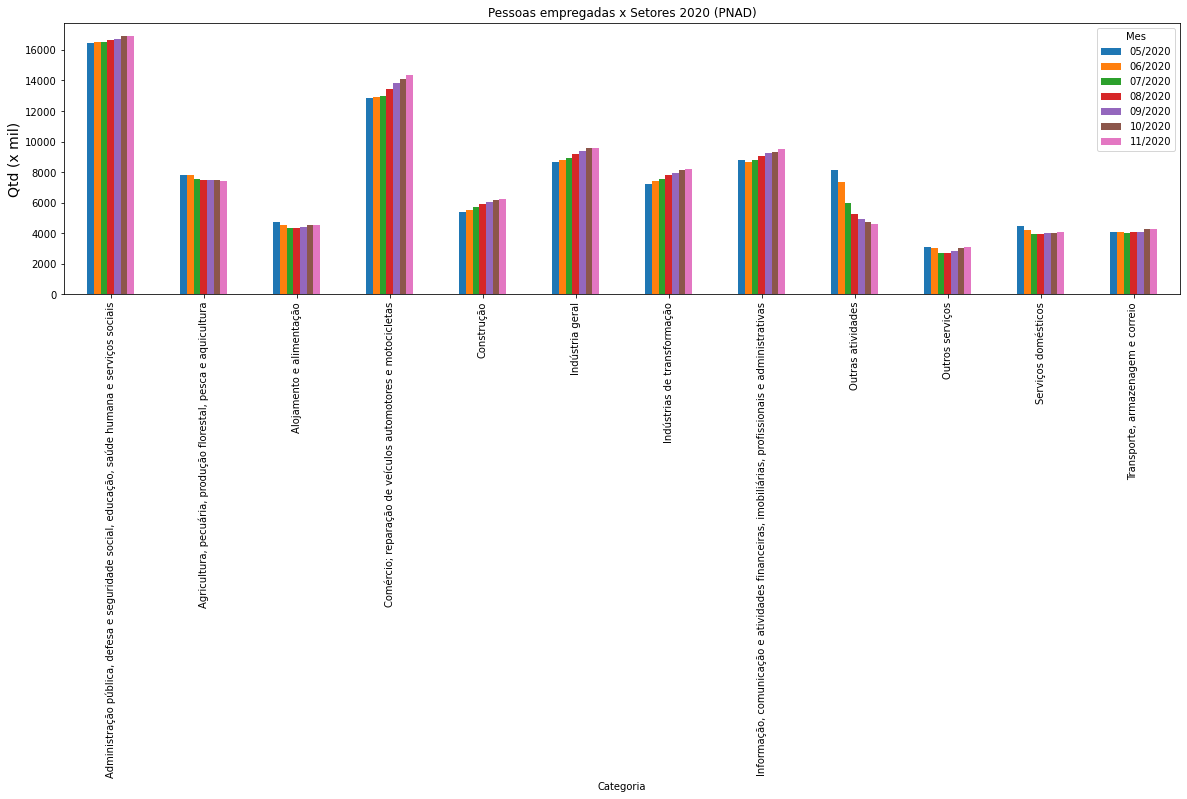

In [16]:
Ocupados.query('Variavel == "Grupamentos de atividade" and Categoria != "Total"').groupby(['Categoria',
                    'Mes']).Empregados.sum().unstack().plot(kind='bar', figsize = (20,5),
                        title = 'Pessoas empregadas x Setores 2020 (PNAD)').set_ylabel('Qtd (x mil)',fontsize=14)

## Dados do CAGED
Importamos os dados do CAGED de Abril de 2020 a Abril de 2021 para análisar os dados de admissões, demissões e salário no período:

In [17]:
#Importa os dados do CAGED, apenas as colunas abaixo
colunas = ['competência','saldomovimentação','seção','graudeinstrução', 'idade', 'sexo','tipomovimentação','salário','raçacor']

abril20 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202004.txt',delimiter=';', usecols=colunas)
maio20 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202005.txt',delimiter=';', usecols=colunas)
junho20 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202006.txt',delimiter=';', usecols=colunas)
julho20 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202007.txt',delimiter=';', usecols=colunas)
agosto20 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202008.txt',delimiter=';', usecols=colunas)
setembro20 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202009.txt',delimiter=';', usecols=colunas)
outubro20 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202010.txt',delimiter=';', usecols=colunas)
novembro20 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202011.txt',delimiter=';', usecols=colunas)
dezembro20 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202012.txt',delimiter=';', usecols=colunas)
janeiro21 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202101.txt',delimiter=';', usecols=colunas)
fevereiro21 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202102.txt',delimiter=';', usecols=colunas)
marco21 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202103.txt',delimiter=';', usecols=colunas)
abril21 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202104.txt',delimiter=';', usecols=colunas)

#Junta todos os meses em uma tabela:
movimentacao = pd.concat([abril20, maio20, junho20, julho20, agosto20,
                         setembro20, outubro20, novembro20, dezembro20, janeiro21, fevereiro21, marco21, abril21]) 
 

             

In [18]:
#Troca a forma que está escrito os meses
troca_competencia = {202004:'04/2020', 202005:'05/2020', 202006:'06/2020',
                     202007:'07/2020', 202008:'08/2020', 202009:'09/2020',
                     202010:'10/2020', 202011:'11/2020', 202012:'12/2020',
                     202101:'01/2021', 202102:'02/2021', 202103:'03/2021',
                     202104:'04/2021'}
movimentacao['competência'] = movimentacao['competência'].apply(lambda x: troca_competencia[x])

In [19]:
troca_tipodemovimentacao = {10:'Admissão por primeiro emprego', 20:'Admissão por reemprego',
                            25:'Admissão por contrato trabalho prazo determinado', 35:'Admissão por reintegração',
                            70:'Admissão por transferência', 31:'Demissão sem justa causa',
                            32:'Demissão com justa causa', 33:'Culpa Recíproca', 40:'Pedido de Demissão',
                            43:'Término contrato de trabalho', 45:'Término contrato de trabalho',
                            50:'Desligamento por aposentadoria', 60:'Desligamento por morte',
                            80:'Desligamento por transferência', 90:'Desligamento por Acordo ',
                            98:'Desligamento de Tipo Ignorado', 99:'Não Identificado'}
movimentacao['tipomovimentação'] = movimentacao['tipomovimentação'].apply(lambda x: troca_tipodemovimentacao[x])

O gráfico abaixo classifica os motivos de Admissões e Demissões no período:

Text(0, 0.5, 'Qtd (milhões)')

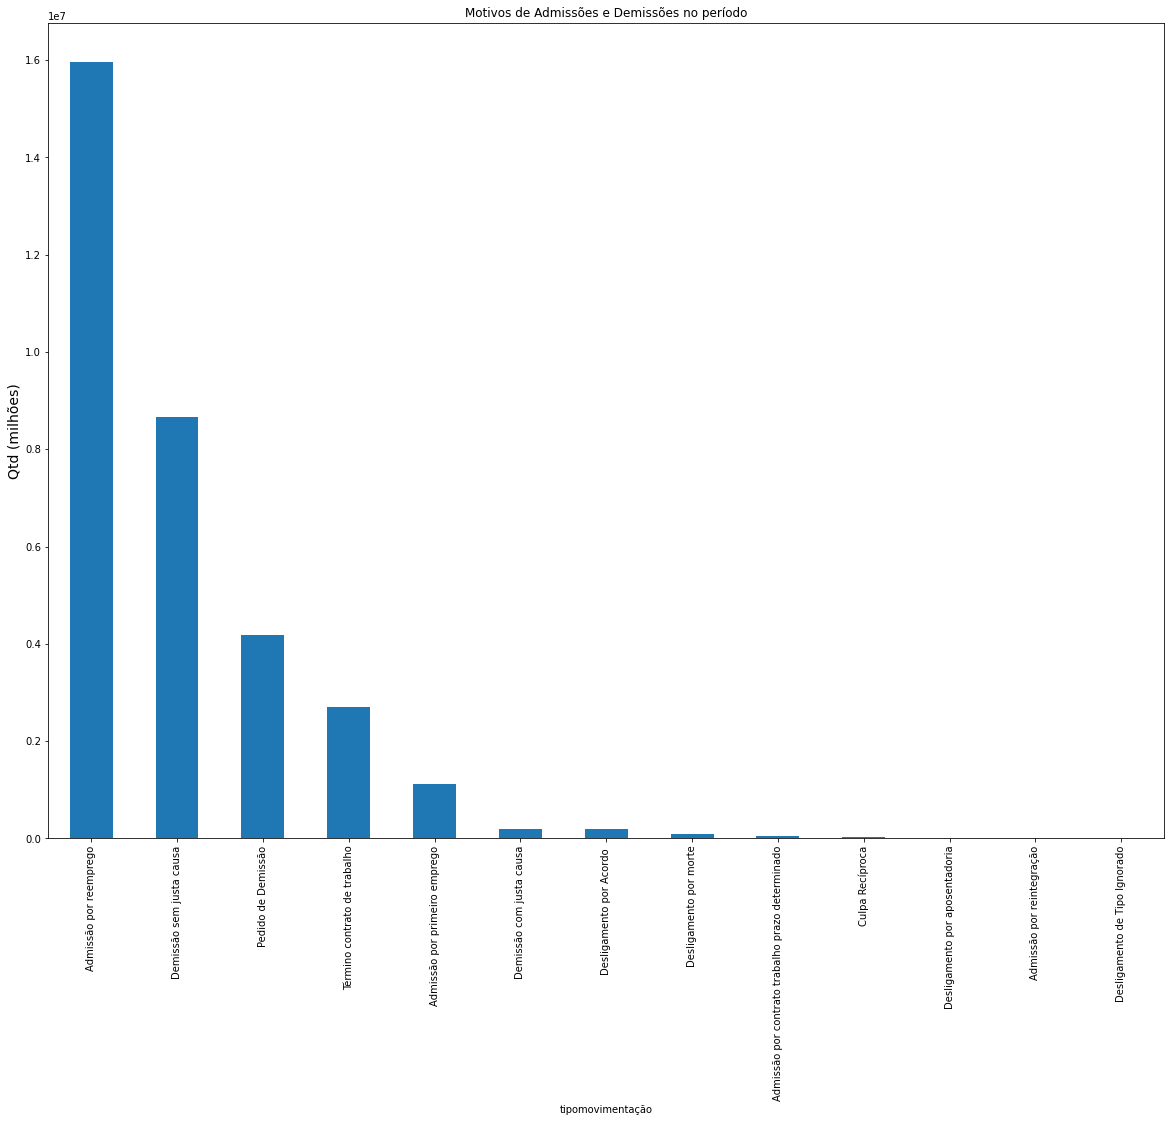

In [20]:
#Gráfico que demonstra os tipos de admissões e demissões no periodo de 04/2020 a 04/2021
movimentacao.query('tipomovimentação != "Não Identificado"').groupby('tipomovimentação').size().sort_values(ascending=False).plot(kind='bar', 
                figsize = (20,15),title = 'Motivos de Admissões e Demissões no período').set_ylabel('Qtd (milhões)',fontsize=14)

In [21]:
movimentacao.query('tipomovimentação != "Não Identificado"').groupby('tipomovimentação').size().sort_values(ascending=False)

tipomovimentação
Admissão por reemprego                              15966180
Demissão sem justa causa                             8674197
Pedido de Demissão                                   4179079
Término contrato de trabalho                         2711274
Admissão por primeiro emprego                        1109610
Demissão com justa causa                              200739
Desligamento por Acordo                               186611
Desligamento por morte                                 84864
Admissão por contrato trabalho prazo determinado       47415
Culpa Recíproca                                        21756
Desligamento por aposentadoria                         16721
Admissão por reintegração                              16542
Desligamento de Tipo Ignorado                            944
dtype: int64

In [22]:
troca_sexo = {1:'Homem', 3:'Mulher', 9: 'Não Identificado'}
movimentacao['sexo'] = movimentacao['sexo'].apply(lambda x: troca_sexo[x])

In [23]:
troca_raca = {1:'Branca', 2:'Preta', 3:'Parda', 4:'Amarela', 5:'Indígena', 6:'Não informada', 9: 'Não Identificado'}
movimentacao['raçacor'] = movimentacao['raçacor'].apply(lambda x: troca_raca[x])

In [24]:
movimentacao['idade'] = movimentacao['idade'].apply(lambda x: '14 a 29 anos' if x <= 29 else '30 a 49 anos' if x > 29 and x <= 49 else '50 a 59 anos' if x > 49 and x <= 59 else '60 anos ou mais' )

x = movimentacao.idade

Text(0.5, 0, 'Qtd')

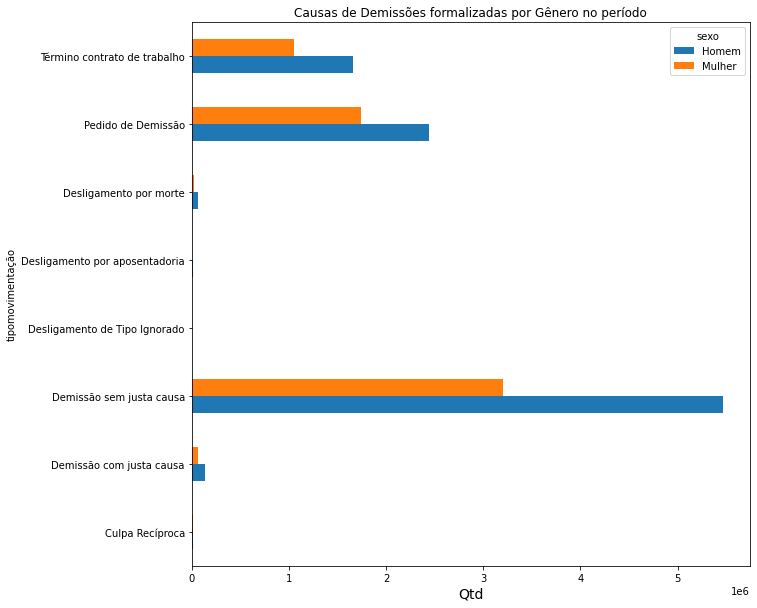

In [25]:
movimentacao.query('tipomovimentação == ["Demissão sem justa causa", "Demissão com justa causa","Culpa Recíproca","Pedido de Demissão", "Término contrato de trabalho", "Desligamento por aposentadoria","Desligamento por morte","Desligamento por Acordo","Desligamento de Tipo Ignorado" ]').groupby(['tipomovimentação',
        'sexo']).size().unstack().plot(kind='barh', 
                figsize = (10,10),title = 'Causas de Demissões formalizadas por Gênero no período').set_xlabel('Qtd',fontsize=14)

Text(0.5, 0, 'Qtd')

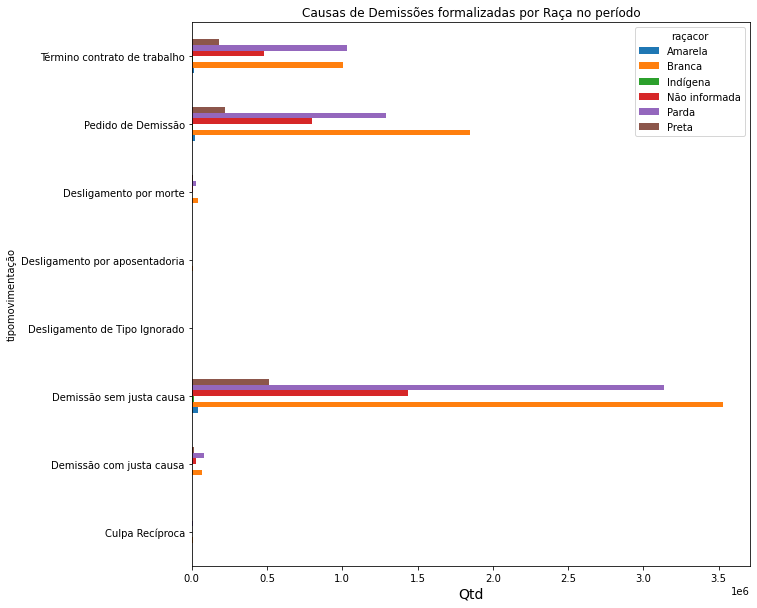

In [26]:
movimentacao.query('tipomovimentação == ["Demissão sem justa causa", "Demissão com justa causa","Culpa Recíproca","Pedido de Demissão", "Término contrato de trabalho", "Desligamento por aposentadoria","Desligamento por morte","Desligamento por Acordo","Desligamento de Tipo Ignorado" ]').groupby(['tipomovimentação',
        'raçacor']).size().unstack().plot(kind='barh', 
                figsize = (10,10),title = 'Causas de Demissões formalizadas por Raça no período').set_xlabel('Qtd',fontsize=14)

Text(0.5, 0, 'Qtd')

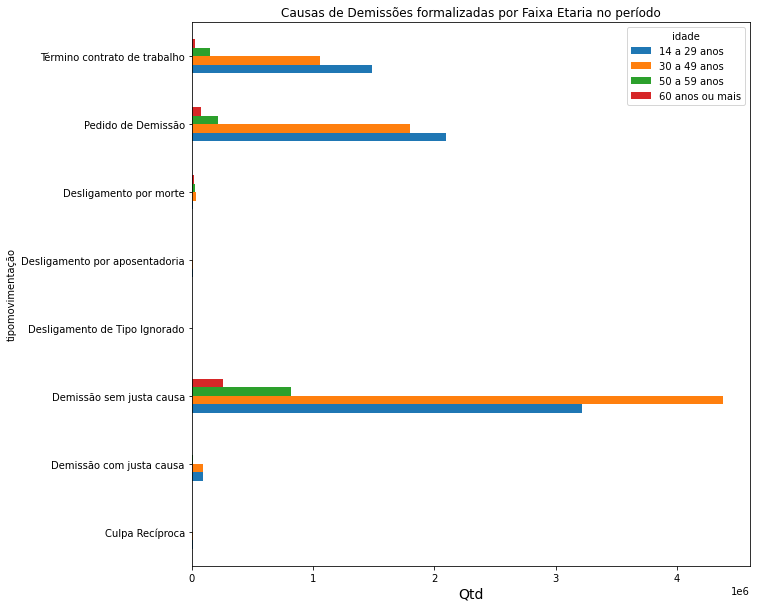

In [27]:
movimentacao.query('tipomovimentação == ["Demissão sem justa causa", "Demissão com justa causa","Culpa Recíproca","Pedido de Demissão", "Término contrato de trabalho", "Desligamento por aposentadoria","Desligamento por morte","Desligamento por Acordo","Desligamento de Tipo Ignorado" ]').groupby(['tipomovimentação',
        'idade']).size().unstack().plot(kind='barh', 
                figsize = (10,10),title = 'Causas de Demissões formalizadas por Faixa Etaria no período').set_xlabel('Qtd',fontsize=14)

In [2]:
colunas = ['competência','saldomovimentação','seção','graudeinstrução', 'idade', 'sexo','tipomovimentação','salário','raçacor']

abril20 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202004.txt',delimiter=';', usecols=colunas)
maio20 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202005.txt',delimiter=';', usecols=colunas)
junho20 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202006.txt',delimiter=';', usecols=colunas)
julho20 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202007.txt',delimiter=';', usecols=colunas)
agosto20 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202008.txt',delimiter=';', usecols=colunas)
setembro20 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202009.txt',delimiter=';', usecols=colunas)
outubro20 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202010.txt',delimiter=';', usecols=colunas)
novembro20 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202011.txt',delimiter=';', usecols=colunas)
dezembro20 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202012.txt',delimiter=';', usecols=colunas)
janeiro21 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202101.txt',delimiter=';', usecols=colunas)
fevereiro21 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202102.txt',delimiter=';', usecols=colunas)
marco21 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202103.txt',delimiter=';', usecols=colunas)
abril21 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202104.txt',delimiter=';', usecols=colunas)

#Junta todos os meses em uma tabela:
movimentacao2 = pd.concat([abril20, maio20, junho20, julho20, agosto20,
                         setembro20, outubro20, novembro20, dezembro20, janeiro21, fevereiro21, marco21, abril21]) 

In [3]:
troca_movimentacao2 = {10:'Admissão', 20:'Admissão', 25:'Admissão', 35:'Admissão', 70:'Não Identificado',
                      31:'Demissão', 32:'Demissão', 33:'Demissão', 40:'Demissão', 43:'Demissão',
                      45:'Demissão', 50:'Demissão', 60:'Demissão', 80:'Não Identificado', 90:'Demissão',
                      98:'Demissão', 99:'Não Identificado'}
movimentacao2['tipomovimentação'] = movimentacao2['tipomovimentação'].apply(lambda x: troca_movimentacao2[x])
#Os códigos 70 (Admissão por Transferência) e 80 (Desligamento por transferencia) estão como não identificados porque
#tratam-se de trabalhadores desligados em um CNPJ e admitidos em um outro CNPJ do mesmo grupo empresarial

In [4]:
#Troca a forma que está escrito os meses
troca_competencia = { 202004:'04/2020', 202005:'05/2020', 202006:'06/2020',
                     202007:'07/2020', 202008:'08/2020', 202009:'09/2020',
                     202010:'10/2020', 202011:'11/2020', 202012:'12/2020',
                     202101:'01/2021', 202102:'02/2021', 202103:'03/2021',
                     202104:'04/2021'}
movimentacao2['competência'] = movimentacao2['competência'].apply(lambda x: troca_competencia[x])

Comparamos as admissões com os desligamentos mês a mês:

Text(0, 0.5, 'Qtd (milhões)')

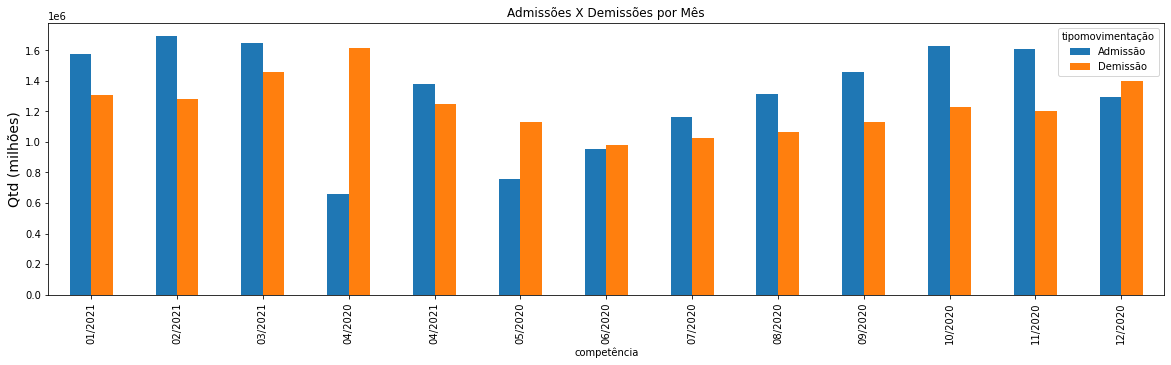

In [31]:
movimentacao2.query('tipomovimentação != "Não Identificado"').groupby(['competência',
        'tipomovimentação']).size().unstack().plot(kind='bar', 
                figsize = (20,5),title = 'Admissões X Demissões por Mês').set_ylabel('Qtd (milhões)',fontsize=14)


In [5]:
troca_sexo = {1:'Homem', 3:'Mulher', 9: 'Não Identificado'}
movimentacao2['sexo'] = movimentacao2['sexo'].apply(lambda x: troca_sexo[x])

Comparamos as admissões/demissões de acordo com o gênero do trabalhador:

Text(0, 0.5, 'Qtd (milhões)')

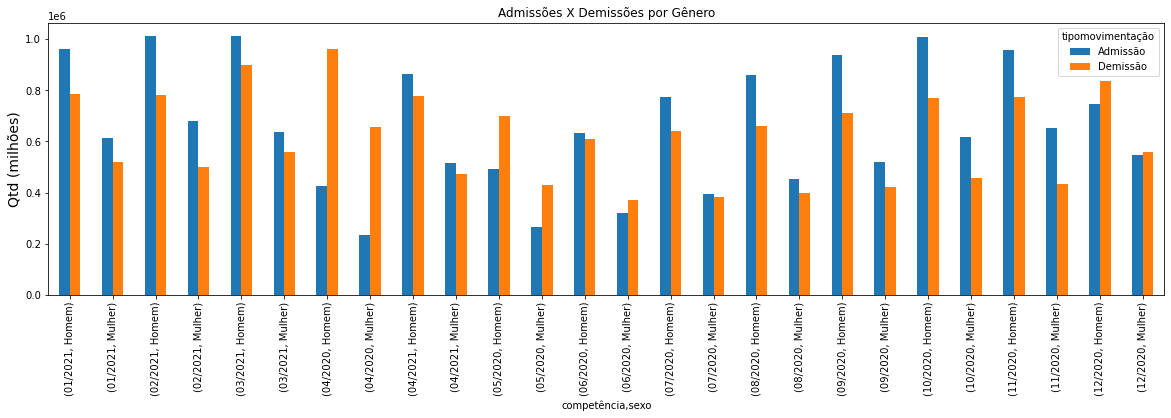

In [34]:
movimentacao2.query('tipomovimentação != "Não Identificado"').groupby(['competência',
        'sexo', 'tipomovimentação']).size().unstack().plot(kind='bar', 
                figsize = (20,5),title = 'Admissões X Demissões por Gênero').set_ylabel('Qtd (milhões)',fontsize=14)

In [35]:
#Define a média salárial
movimentacao2.query('tipomovimentação == "Admissão"').groupby(['sexo', 'competência'])["salário"].mean()

sexo    competência
Homem   01/2021         19214.945144
        02/2021         71708.508581
        03/2021          2623.270234
        04/2020          3199.474114
        04/2021          2671.748487
        05/2020          2756.553605
        06/2020          2717.049022
        07/2020          2407.760250
        08/2020          2344.253694
        09/2020          2440.437252
        10/2020          3085.317524
        11/2020        335948.303571
        12/2020          2351.381562
Mulher  01/2021          2246.973899
        02/2021          2081.596127
        03/2021          2145.412417
        04/2020          2184.393147
        04/2021          2080.938933
        05/2020          2069.222703
        06/2020          5645.561573
        07/2020          1977.266362
        08/2020          8281.220769
        09/2020          1967.342154
        10/2020          1921.153795
        11/2020          2122.491523
        12/2020          1829.394422
Name: salário, dty

In [6]:
movimentacao2.query('competência == "11/2020" and sexo == "Homem"')[['competência',
            'graudeinstrução', 'idade', 'raçacor','sexo','salário']].sort_values(by = 'salário',ascending=False).head(10)

,competência,graudeinstrução,idade,raçacor,sexo,salário
1002827,11/2020,7,20.0,6,Homem,3.200002e+11
1906673,11/2020,7,34.0,1,Homem,1.104004e+08
1931797,11/2020,7,31.0,1,Homem,1.052700e+08
372021,11/2020,7,37.0,1,Homem,1.040116e+08
990056,11/2020,8,35.0,1,Homem,9.859080e+07
1924357,11/2020,7,33.0,1,Homem,8.712000e+07
812921,11/2020,7,39.0,1,Homem,6.761480e+07
892978,11/2020,7,32.0,1,Homem,6.330720e+07
246662,11/2020,4,30.0,3,Homem,6.267800e+07
115966,11/2020,7,22.0,3,Homem,6.239728e+07


(Text(0, 0.5, 'Qtd (milhões)'),)

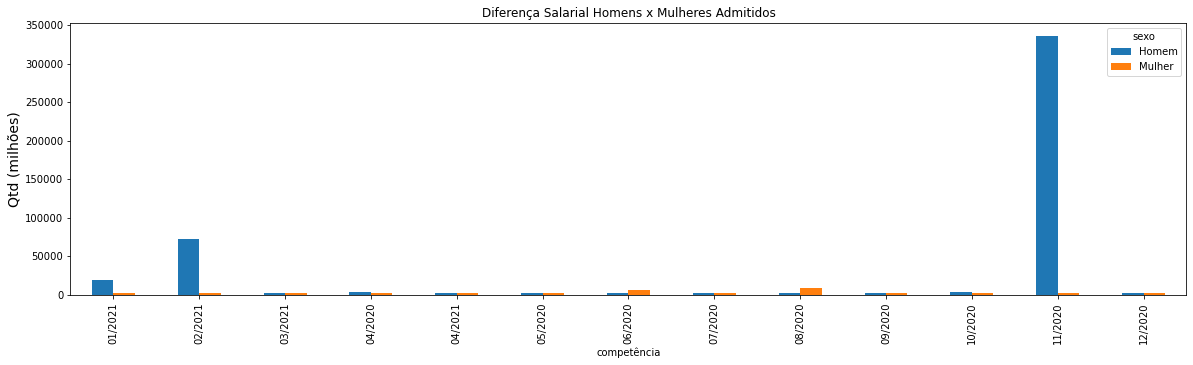

In [36]:
movimentacao2.query('tipomovimentação == "Admissão"').groupby(['competência',
                        'sexo'])["salário"].mean().unstack().plot(kind='bar', figsize = (20,5),
                                title = 'Diferença Salarial Homens x Mulheres Admitidos').set_ylabel('Qtd (milhões)',fontsize=14),

Desconsiderando a competência 11/2020, 01/2021 e 02/2021:

(Text(0, 0.5, 'Qtd (milhões)'),)

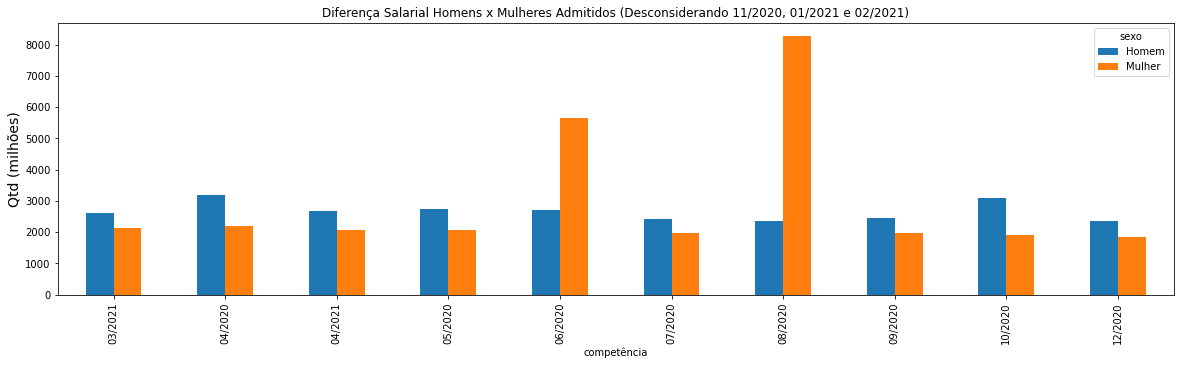

In [11]:
movimentacao2.query('tipomovimentação == "Admissão" and competência != ["11/2020", "01/2021", "02/2021"]').groupby(['competência',
                        'sexo'])["salário"].mean().unstack().plot(kind='bar', figsize = (20,5),
                                title = 'Diferença Salarial Homens x Mulheres Admitidos (Desconsiderando 11/2020, 01/2021 e 02/2021)').set_ylabel('Qtd (milhões)',fontsize=14),

In [7]:
movimentacao2.query('tipomovimentação == "Demissão"').groupby(['sexo', 'competência'])["salário"].mean()

sexo    competência
Homem   01/2021         7220.250875
        02/2021         8318.142863
        03/2021         8844.589062
        04/2020         3897.778623
        04/2021         6351.151899
        05/2020         4391.725990
        06/2020         3528.630318
        07/2020        12122.476647
        08/2020        10341.481230
        09/2020         9388.390886
        10/2020         9613.788937
        11/2020         7357.381026
        12/2020         9340.771307
Mulher  01/2021         4800.219774
        02/2021         5218.954075
        03/2021         4853.479625
        04/2020         2338.097831
        04/2021         3105.855654
        05/2020         2418.396182
        06/2020         2402.477535
        07/2020         4713.251800
        08/2020         3662.108275
        09/2020         3567.048371
        10/2020         3609.778727
        11/2020         4284.789918
        12/2020         3696.755644
Name: salário, dtype: float64

(Text(0, 0.5, 'Média Salárial (R$)'),)

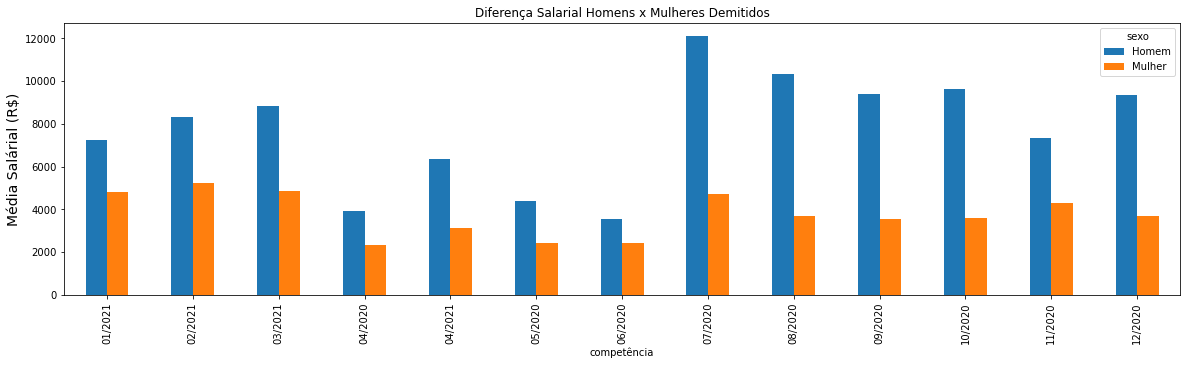

In [8]:
movimentacao2.query('tipomovimentação == "Demissão"').groupby(['competência',
                        'sexo'])["salário"].mean().unstack().plot(kind='bar', figsize = (20,5),
                                title = 'Diferença Salarial Homens x Mulheres Demitidos').set_ylabel('Média Salárial (R$)',fontsize=14),

In [12]:
troca_raca = {1:'Branca', 2:'Preta', 3:'Parda', 4:'Amarela', 5:'Indígena', 6:'Não informada', 9: 'Não Identificado'}
movimentacao2['raçacor'] = movimentacao2['raçacor'].apply(lambda x: troca_raca[x])

(Text(0, 0.5, 'Média Salárial (R$)'),)

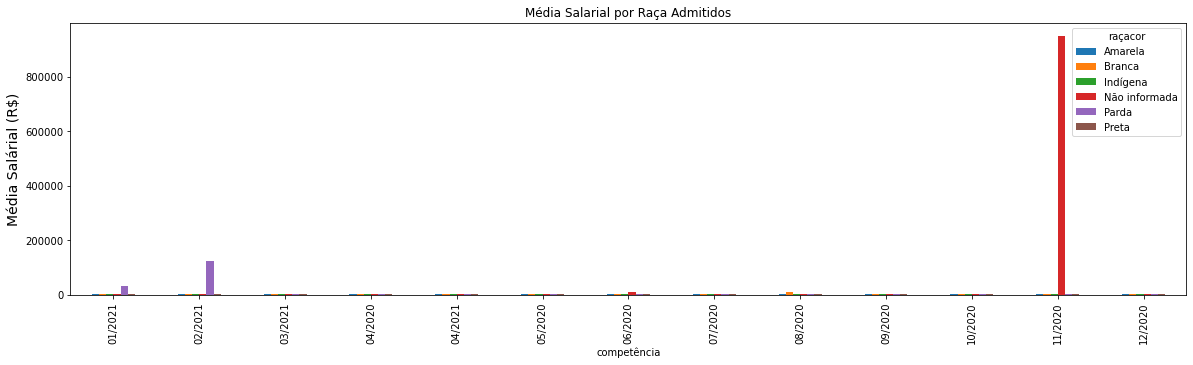

In [13]:
movimentacao2.query('tipomovimentação == "Admissão"').groupby(['competência',
                        'raçacor'])["salário"].mean().unstack().plot(kind='bar', figsize = (20,5),
                                title = 'Média Salarial por Raça Admitidos').set_ylabel('Média Salárial (R$)',fontsize=14),

In [14]:
movimentacao2.query('tipomovimentação == "Admissão"').groupby(['raçacor', 'competência'])["salário"].mean()

raçacor  competência
Amarela  01/2021        2632.781760
         02/2021        2897.200750
         03/2021        2769.932323
         04/2020        2797.713599
         04/2021        2716.512076
                           ...     
Preta    08/2020        2051.469122
         09/2020        2247.191155
         10/2020        1974.367407
         11/2020        1902.954747
         12/2020        1979.490352
Name: salário, Length: 78, dtype: float64

Desconsiderando 11/2020, 01/2021 e 02/2021

(Text(0, 0.5, 'Média Salárial (R$)'),)

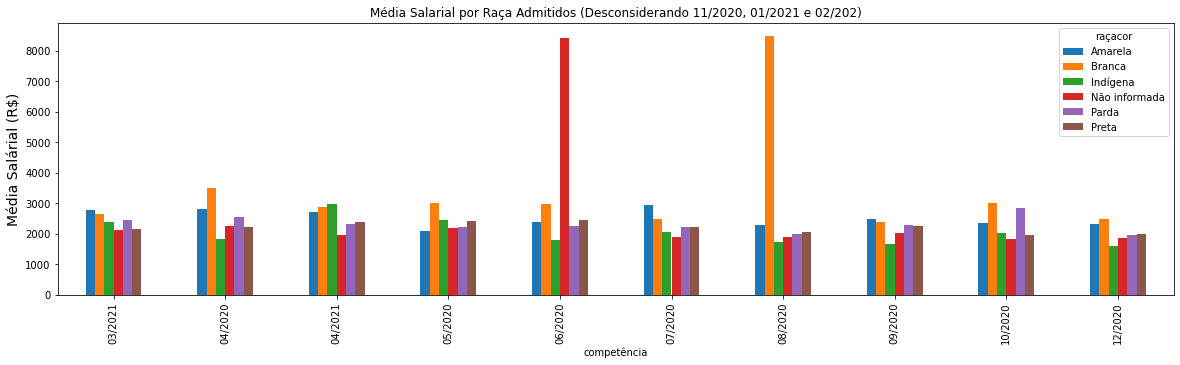

In [16]:
movimentacao2.query('tipomovimentação == "Admissão" and competência != ["11/2020", "01/2021", "02/2021"]').groupby(['competência',
                        'raçacor'])["salário"].mean().unstack().plot(kind='bar', figsize = (20,5),
                                title = 'Média Salarial por Raça Admitidos (Desconsiderando 11/2020, 01/2021 e 02/202)').set_ylabel('Média Salárial (R$)',fontsize=14),

In [17]:
movimentacao2['salário'] = movimentacao2['salário'].apply(lambda x: 'E' if x <= 2090 else 'D' if x > 2090 and x <=4180 else 'C' if x > 4180 and x <= 10450 else 'B' if x > 10450 and x <= 20900 else 'A')

x = movimentacao2.salário

In [141]:
movimentacao2.sample(10)

,competência,seção,saldomovimentação,graudeinstrução,idade,raçacor,sexo,tipomovimentação,salário
1155547,03/2021,G,1,7,36.0,Não informada,Mulher,Admissão,E
1183224,03/2021,N,-1,6,24.0,Parda,Homem,Demissão,E
727245,03/2021,G,-1,7,18.0,Parda,Mulher,Demissão,E
2016961,03/2021,F,-1,7,38.0,Não informada,Homem,Demissão,D
306922,03/2021,F,1,7,65.0,Parda,Homem,Admissão,D
736216,03/2021,J,1,11,68.0,Parda,Homem,Admissão,C
1065348,03/2021,C,1,80,28.0,Não informada,Homem,Admissão,D
1105919,04/2021,C,-1,6,33.0,Parda,Homem,Demissão,E
1755786,04/2021,C,1,4,51.0,Branca,Homem,Admissão,E
590337,04/2021,C,-1,7,34.0,Branca,Homem,Demissão,E


Text(0, 0.5, 'Qtd (milhões)')

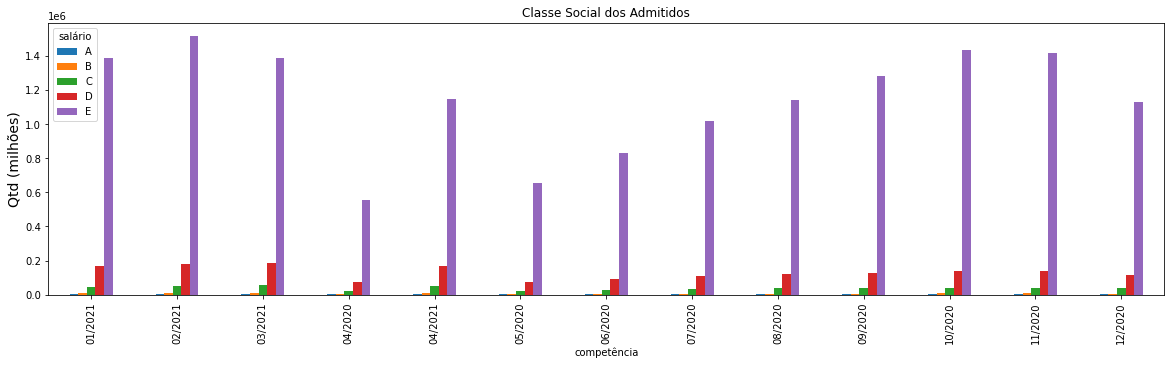

In [20]:
movimentacao2.query('tipomovimentação == "Admissão"').groupby(['competência',
                        'salário']).size().unstack().plot(kind='bar', figsize = (20,5),
                                title = 'Classe Social dos Admitidos').set_ylabel('Qtd (milhões)',fontsize=14)

Text(0, 0.5, 'Qtd (milhões)')

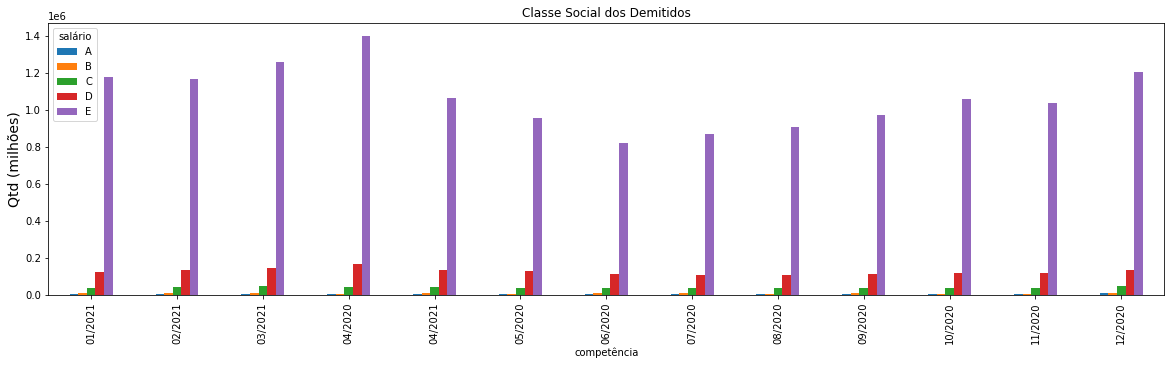

In [22]:
movimentacao2.query('tipomovimentação == "Demissão"').groupby(['competência',
                        'salário']).size().unstack().plot(kind='bar', figsize = (20,5),
                                title = 'Classe Social dos Demitidos').set_ylabel('Qtd (milhões)',fontsize=14)

# Estatísticas do Consumo

Utilizamos como base os dados da Pesquisa Mensal de Comércio do IBGE

### O que é
A Pesquisa Mensal de Comércio produz indicadores que permitem acompanhar o comportamento conjuntural do comércio varejista no País, investigando a receita bruta de revenda nas empresas formalmente constituídas, com 20 ou mais pessoas ocupadas, e cuja atividade principal é o comércio varejista. 

A partir de janeiro de 2004, iniciou-se a série da pesquisa, com base 2003=100. 

A partir de janeiro de 2017, iniciou-se uma nova série com ano-base em 2014.

Fonte: [IBGE](https://www.ibge.gov.br/estatisticas/economicas/comercio/9227-pesquisa-mensal-de-comercio.html?=&t=o-que-e)

In [78]:
#Importa dados do IBGE (Pesquisa Mensal de Comércio)
colunas = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
filename = r'C:/Users/User/Desktop/bases_de_dados/pmc_202104_05.xls'
df = pd.read_excel(filename, usecols=colunas).drop([0,1,2,3,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42])


In [80]:
#Troca o nome das colunas
df.rename(columns={'Pesquisa Mensal de Comércio': 'Atividades',
                   'Unnamed: 1': '2020/04', 'Unnamed: 2': '2020/05', 'Unnamed: 3': '2020/06', 'Unnamed: 4': '2020/07',
                   'Unnamed: 5': '2020/08', 'Unnamed: 6': '2020/09', 'Unnamed: 7': '2020/10', 'Unnamed: 8': '2020/11',
                   'Unnamed: 9': '2020/12', 'Unnamed: 10': '2021/01', 'Unnamed: 11': '2021/02', 'Unnamed: 12': '2021/03',
                   'Unnamed: 13': '2021/04'
                  }, inplace=True)

In [81]:
df.head(20)

,Atividades,2020/04,2020/05,2020/06,2020/07,2020/08,2020/09,2020/10,2020/11,2020/12,2021/01,2021/02,2021/03,2021/04
4,Comércio Varejista (1),74.2,85.9,90.2,97.9,101.1,98,104.7,108.6,125.1,93.6,86.1,91.3,91.8
5,1. Combustíveis e lubrificantes,57.8,62.1,65.1,73.1,72.6,73.8,78.4,73.8,76.7,71.1,65.9,68.8,69.3
6,"2. Hipermercados, supermercados, produtos alim...",100.9,105.5,100.5,105.6,105.5,100.5,108.5,103.2,123.1,98.1,93,104,99.1
7,2.1. Hipermercados e supermercados,103.2,108.1,102.6,107.9,107.8,102.2,110.7,105.7,126.5,100.5,95.3,106.5,101.5
8,"3. Tecidos, vestuário e calçados",13.9,32.3,50,60.5,77.2,71,81,91.2,146.1,57.7,55,37.1,55.7
9,4. Móveis e eletrodomésticos,47.7,76.8,91.2,101.3,106,104.3,102,124.8,122.5,88.2,80.5,75.1,81.7
10,4.1. Móveis,40.5,65.1,83.7,98.7,102.8,97.6,96.7,111.3,114.1,79.6,72.8,69.9,76.8
11,4.2. Eletrodomésticos,50.9,81.9,93.9,101.7,106.8,105.2,103.8,130.2,125.8,91.5,83.7,76.7,83.3
12,"5. Artigos farmacêuticos, médicos, ortopédicos...",99.9,115.5,119.5,134,130,130,137.2,140.1,152.6,133.4,123,144.5,133.9
13,"6. Livros, jornais, revistas e papelaria",12.5,14,22.7,33.9,25,23.1,25.6,32.6,43.4,39.4,35.4,23.4,24.5


In [82]:
consumo = df.query('Atividades != 0 ')[['Atividades', '2020/04',
    '2020/05', '2020/06', '2020/07','2020/08','2020/09','2020/10','2020/11',
      '2020/12', '2021/01', '2021/02', '2021/03', '2021/04']].melt(id_vars=["Atividades"], 
        var_name="Mes", value_name="Indice")

In [83]:
consumo.sample(10)

,Atividades,Mes,Indice
86,8. Outros artigos de uso pessoal e doméstico,2020/09,117.9
188,"5. Artigos farmacêuticos, médicos, ortopédicos...",2021/04,133.9
183,2.1. Hipermercados e supermercados,2021/04,101.5
43,"9. Veículos, motocicletas, partes e peças",2020/06,71.4
18,2.1. Hipermercados e supermercados,2020/05,108.1
25,"7. Equipamentos e materiais para escritório, i...",2020/05,54.2
64,"3. Tecidos, vestuário e calçados",2020/08,77.2
1,1. Combustíveis e lubrificantes,2020/04,57.8
68,"5. Artigos farmacêuticos, médicos, ortopédicos...",2020/08,130
32,"2. Hipermercados, supermercados, produtos alim...",2020/06,100.5


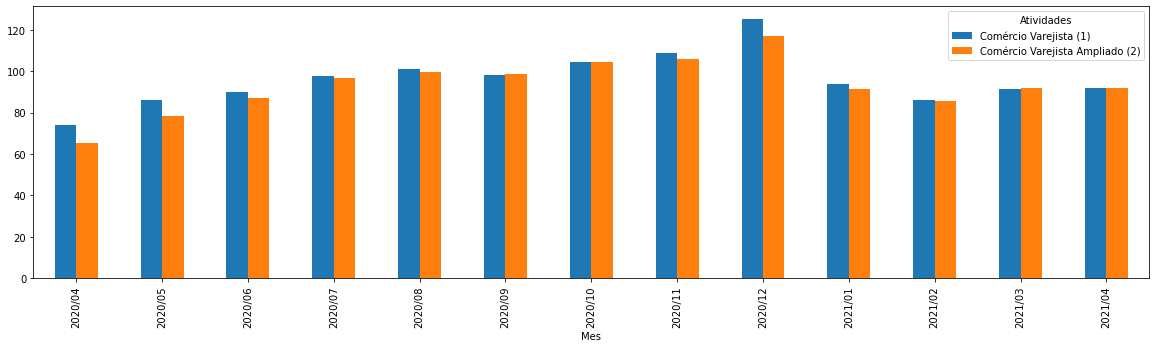

In [84]:
consumo.query('Atividades == ["Comércio Varejista (1)", "Comércio Varejista Ampliado (2)"]').groupby(['Mes',
                                                        'Atividades']).Indice.sum().unstack().plot(kind='bar', figsize = (20,5))